# 기본 ML 모델

## 실습 개요
기본 ML 모델


1) 실습 목적
 * 실제 주가 데이터셋(OHLCV)을 이용해 여러가지 기본적인 머신러닝 모델을 이용해보는 실습을 진행합니다.
 * 대표적인 머신러닝 패키지인 sklearn을 이용해 다양한 머신러닝 모델의 결과를 해석하고, 모델 결과를 시각화해봅니다.


2) 수강 목표
 * sklearn을 이용해 기본적인 머신러닝 모델(KNN, Decision Tree, Linear Regression 등)을 학습할 수 있습니다.
 * 위에서 학습된 머신러닝 모델 결과를 시각화하고 해석할 수 있습니다.

### 실습 목차

- **1. 데이터 불러오기 및 전처리**
    - 1-1 실습 데이터 구성하기
    - 1-2 데이터셋 분할
- **2. 모델링 (Modeling)**
    - 2-1 Linear Regression
    - 2-2 KNN (K-Nearest Neighbor)
    - 2-3 Decision Tree
    - 2-4 Random Forest
- **3. 부동산 데이터에 관한 회귀분석**
    - 3-1 회귀분석 모델링

### 데이터셋 개요
* 데이터셋: Yahoo Finance OHLCV 데이터셋이란? (Open High Close Low Volume)
* 데이터셋 개요 : **Yahoo Finance는 주식, 환율과 같은 금융 정보를 제공하는 플랫폼입니다.** 주식과 관련된 정보 및 시각화 정보를 웹사이트를 통해서 제공 (NASDAQ, KOSPI, NIKKEI 등) 됩니다. 데이터는 무료로 사용할 수 있으며, API를 제공하여 손쉽게 데이터를 수집 가능합니다. 또한, Yahoo Finance 정보를 랩핑한 yfinance 패키지를 이용해 파이썬에서도 사용 가능합니다.
  - (O)pen (시가): 주식의 거래가 시작된 가격을 나타냅니다. 시장이 열리면 처음으로 발생한 거래의 가격입니다.
  - (H)igh (고가): 특정 기간 동안 주식의 가격 중 최고점을 나타냅니다. 이는 해당 기간 동안 주식이 얼마나 높게 거래되었는지를 보여줍니다.
  - (C)lose (종가): 주식의 거래가 마감된 가격을 나타냅니다. 시장이 닫힐 때 주식이 어떤 가격으로 거래를 마쳤는지를 보여줍니다.
  - (L)ow (저가): 특정 기간 동안 주식의 가격 중 최저점을 나타냅니다. 이는 해당 기간 동안 주식이 얼마나 낮게 거래되었는지를 보여줍니다.
  - (V)Volume (거래량):  특정 기간 동안 거래된 주식의 총 수량을 나타냅니다. 거래량은 주식 시장에서 매우 중요한 지표 중 하나이며, 주식의 유동성과 관련이 있습니다. 더 높은 거래량은 주식 시장의 활발한 거래를 나타낼 수 있습니다.
  - Change (변동률): 이전 주가와 비교해 변화된 변동률 입니다.
  - code (종목 코드): 종목(회사)를 구분하는 코드입니다.
* 데이터셋 저작권 : Apache Software License (Apache)

### 환경 설정

- **패키지 설치 및 임포트**

In [76]:
!uv add pydotplus

Resolved 189 packages in 18ms
Audited 88 packages in 29ms


In [77]:
# 계산
import numpy as np

# 데이터셋 로드 및 정제
import pandas as pd
import os

# 전처리
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 모델
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy as sp

# 출력 및 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from sklearn.tree import export_graphviz
from IPython.display import Image
from tqdm import tqdm

# 평가
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 코드 셀 실행 후 경고를 무시
import warnings;warnings.filterwarnings('ignore')

## 1. 데이터 불러오기 및 전처리
- **1-1 실습 데이터 구성하기**
- **1-2 데이터셋 분할**

### 1-1 실습 데이터 구성하기

#### 📝 설명 : (1-1)
> 이번 실습에 필요한 주가 관련 데이터(OHLCV)를 불러오고, 파생 변수 제작 및 정제를 하겠습니다.

#### 👨‍💻 코드 : (1-1)

In [79]:
# 데이터셋 파일 위치로 경로 수정 (현재 노트북 기준 data 폴더)
DATA_DIR = os.path.join(os.getcwd(), 'data')
if not os.path.basename(os.getcwd()) == 'data':
    os.chdir(DATA_DIR)
print(f"작업 디렉토리: {os.getcwd()}")

작업 디렉토리: /Users/tylersong/Desktop/workspace/learn/python/offline/TIL/ml/data


In [80]:
# OHLCV 데이터셋 불러오기
OHLCV_file = "OHLCV.parquet"
OHLCV_data = pd.read_parquet(OHLCV_file)

# 데이터가 방대하니 이번 실습에서는 2020-01-01 ~ 2023-07-31의 데이터만 활용하겠습니다.
# 날짜는 데이터셋의 index로 되어 있습니다.
# .loc을 통해서 날짜 범위를 지정해줍시다.
OHLCV_data = OHLCV_data.loc["2020-01-01":"2023-07-31"]

# 상장법인정보 파일도 불러오도록 하겠습니다.
company_file = "Company.parquet"
company_data = pd.read_parquet(company_file)

In [81]:
# OHLCV은 종목별 주가와 관련된 정보를 나타내는 데이터셋입니다.
display(OHLCV_data.head(10))

# 상장법인정보 데이터셋입니다.
display(company_data.head(10))

,Open,High,Low,Close,Volume,Change,code
2020-01-02,321000.000000,321000.000000,313500.000000,314000.000000,139496,-0.011024,051910
2020-01-02,38996.097656,38996.097656,37926.585938,38091.125000,190202,-0.021142,000100
2020-01-02,153187.125000,154879.796875,148955.437500,152340.781250,734725,-0.005525,068270
2020-01-02,110659.898438,111675.125000,108121.828125,109137.054688,229273,-0.009217,028260
2020-01-02,658760.312500,668649.312500,647349.937500,651914.062500,71172,-0.010393,207940
2020-01-02,26950.000000,26950.000000,26700.000000,26700.000000,489901,-0.011111,030200
2020-01-02,237000.000000,237500.000000,231500.000000,232000.000000,186494,-0.016949,006400
2020-01-02,36450.000000,36650.000000,35900.000000,35950.000000,1028130,-0.025745,086790
2020-01-02,74400.000000,74800.000000,73000.000000,73100.000000,273967,-0.018792,032830
2020-01-02,44100.000000,44300.000000,42300.000000,42500.000000,1355029,-0.040632,000270


,company,code,industry,products,listing_date,closing_month,region
0,삼성전자,005930,반도체 제조업,"메모리반도체, 시스템LSI",1975-06-11,12월,경기
1,SK하이닉스,000660,반도체 제조업,"DRAM, NAND Flash",1996-12-26,12월,경기
2,NAVER,035420,소프트웨어 개발업,"인터넷 검색, 커머스",2008-11-28,12월,경기
3,카카오,035720,소프트웨어 개발업,"메신저, 포털 서비스",2017-07-10,12월,제주
4,현대자동차,005380,자동차 제조업,"자동차, 차량부품",1974-06-28,12월,서울
5,기아,000270,자동차 제조업,"자동차, 차량부품",1973-07-21,12월,서울
6,LG화학,051910,기초화학물질 제조업,"석유화학, 첨단소재",2001-04-25,12월,서울
7,삼성SDI,006400,일차전지 및 축전지 제조업,"이차전지, 전자재료",1979-03-09,12월,경기
8,삼성바이오로직스,207940,의약품 제조업,바이오의약품 위탁생산,2016-11-10,12월,인천
9,셀트리온,068270,의약품 제조업,바이오시밀러 의약품,2008-09-23,12월,인천


In [82]:
# 현재 데이터프레임의 인덱스가 날짜로 되어있습니다.
# 분석 편의를 위해서 Date컬럼을 새로 만들고, 인덱스는 새로 초기화 하겠습니다.
OHLCV_data["Date"] = OHLCV_data.index
OHLCV_data["Date"] = pd.to_datetime(OHLCV_data["Date"])
OHLCV_data.reset_index(drop=True, inplace=True)

# 두 파일을 결합시켜 OHCLV와 상장법인정보를 함께 볼수 있도록 하겠습니다.
OHLCV_data = pd.merge(OHLCV_data, company_data, on="code", how="inner")

OHLCV_data["Target"] = OHLCV_data.groupby("code")["Close"].shift(-1)

# 파생 변수1 - 가격 차이를 구합시다.
OHLCV_data["PriceRange"] = OHLCV_data["High"] - OHLCV_data["Low"]
# 파생 변수2 - 종목의 대푯값인 평균 가격를 구합시다.
OHLCV_data["AveragePrice"] = (OHLCV_data["Open"] + OHLCV_data["High"] + OHLCV_data["Low"] - OHLCV_data["Close"]) / 4
# 파생 변수3 - 종가가 시가보다 크면 주가의 방향은 양(1)으로, 반대로 종가가 시가보다 작으면 음(-1)을 표현하도록 하겠습니다.
OHLCV_data['PriceDirection'] = OHLCV_data.apply(lambda row: 1 if row['Close'] > row['Open'] else -1, axis=1)
# 파생 변수4 - 일일 수익률을 계산합니다.
OHLCV_data['DailyReturn'] = OHLCV_data.groupby('code')['Close'].transform(lambda x: x.pct_change() * 100)
# 파생 변수5 - 장기, 중기, 단기 이동평균을 파생변수로 추가합니다.
OHLCV_data["MovingAverage5d"] = OHLCV_data.groupby("code")["Close"].transform(lambda x: x.rolling(window=5).mean())
OHLCV_data["MovingAverage20d"] = OHLCV_data.groupby("code")["Close"].transform(lambda x: x.rolling(window=20).mean())
OHLCV_data["MovingAverage60d"] = OHLCV_data.groupby("code")["Close"].transform(lambda x: x.rolling(window=60).mean())
OHLCV_data["MovingAverage120d"] = OHLCV_data.groupby("code")["Close"].transform(lambda x: x.rolling(window=120).mean())

# 파생 변수6 - 볼린저 밴드(Bolinger bands)는 이동 평균을 기준으로 상한, 하한 밴드를 구성하여 추세와 변동성을 파악하는 기술입니다.
# 표준편차에 대한 상한 및 하한 밴드의 배수 설정
std_multiplier = 2
std = OHLCV_data.groupby("code")["Close"].transform(lambda x: x.rolling(window=20).std())
# 상한은 일반적으로 20일 이동평균에 2배의 표준편차 더하기
# 하한은 일반적으로 20일 이동평균에 2배의 표준편차 빼기
OHLCV_data["LowerBollingerBand"] = OHLCV_data["MovingAverage20d"] + (std_multiplier * std)
OHLCV_data["UpperBollingerBand"] = OHLCV_data["MovingAverage20d"] - (std_multiplier * std)

# 파생 변수7 - MACD (Moving Average Convergence & Divergence)는 추가 추세의 힘과 방향성을 파악하여 매매신호를 잡는 목적으로 사용됩니다.
OHLCV_data['ShortEMA'] = OHLCV_data["Close"].ewm(span=12, adjust=False).mean()
OHLCV_data['LongEMA'] = OHLCV_data["Close"].ewm(span=26, adjust=False).mean()
OHLCV_data['MACD'] = OHLCV_data['ShortEMA'] - OHLCV_data['LongEMA']

In [83]:
# 파생 변수8 - OHLCV컬럼 모두 업종별로 일일 평균, 중앙값을 집계해보겠습니다.
# 일별, 업종별로 집계를 해야하기 때문에 두개의 변수(Date, industry)가 집계요소로 들어갑니다.
# 일별 시가의 평균, 중앙값
open_stats = OHLCV_data.groupby(["Date", "industry"])["Open"].agg(["mean", "median"])
open_stats.columns = ["OpenMean", "OpenMedian"]
OHLCV_data = pd.merge(OHLCV_data, open_stats, how="inner", on=["industry", "Date"])
# 일별 고가의 평균, 중앙값
high_stats = OHLCV_data.groupby(["Date", "industry"])["High"].agg(["mean", "median"])
high_stats.columns = ["HighMean", "HighMedian"]
OHLCV_data = pd.merge(OHLCV_data, high_stats, how="inner", on=["industry", "Date"])
# 일별 저가의 평균, 중앙값
low_stats = OHLCV_data.groupby(["Date", "industry"])["Low"].agg(["mean", "median"])
low_stats.columns = ["LowMean", "LowMedian"]
OHLCV_data = pd.merge(OHLCV_data, low_stats, how="inner", on=["industry", "Date"])
# 일별 종가의 평균, 중앙값
close_stats = OHLCV_data.groupby(["Date", "industry"])["Close"].agg(["mean", "median"])
close_stats.columns = ["CloseMean", "CloseMedian"]
OHLCV_data = pd.merge(OHLCV_data, close_stats, how="inner", on=["industry", "Date"])
# 일별 거래량의 평균, 중앙값
volume_stats = OHLCV_data.groupby(["Date", "industry"])["Volume"].agg(["mean", "median"])
volume_stats.columns = ["VolumeMean", "VolumeMedian"]
OHLCV_data = pd.merge(OHLCV_data, volume_stats, how="inner", on=["industry", "Date"])

# 파생 변수 9 - 시간관련 파생 변수
# Date, listing_date컬럼은 "2020-01-01" 형태로 되어있어요.
# 이걸 컴퓨터가 인식할 수 있도록 년,월,일 정수 컬럼으로 나눠서 표현해볼게요.
# Date컬럼 나누기
OHLCV_data["DateYear"] = OHLCV_data["Date"].dt.year
OHLCV_data["DateMonth"] = OHLCV_data["Date"].dt.month
OHLCV_data["DateDay"] = OHLCV_data["Date"].dt.day
# listing_date컬럼 나누기
OHLCV_data["ListingDateYear"] = OHLCV_data["listing_date"].dt.year
OHLCV_data["ListingDateMonth"] = OHLCV_data["listing_date"].dt.month
OHLCV_data["ListingDateDay"] = OHLCV_data["listing_date"].dt.day
# closing_month컬럼은 "12월" 형태이기 때문에 "월"을 빼고 정수만 남기도록 할게요.
OHLCV_data["ClosingMonthInt"] = OHLCV_data["closing_month"].str.replace('월', '').astype(int)

In [84]:
# Label Encoding을 진행합니다.
# sklearn에서 제공하는 LabelEncoder를 활용합시다.
label_encoder = LabelEncoder()

OHLCV_data["LEncodedIndustry"] = label_encoder.fit_transform(OHLCV_data["industry"])
OHLCV_data["LEncodedProducts"] = label_encoder.fit_transform(OHLCV_data["products"])
OHLCV_data["LEncodedRegion"] = label_encoder.fit_transform(OHLCV_data["region"])

# Frequency Encoding을 진행합니다.
frequency_encoder = OHLCV_data["industry"].value_counts()
OHLCV_data['FEncodedIndustry'] = OHLCV_data['industry'].map(frequency_encoder)

# Target Encoding을 진행합니다.
# 각 업종별 종가의 평균 계산
target_encoder = OHLCV_data.groupby("industry")["Close"].mean()
OHLCV_data["TEncodedIndustry"] = OHLCV_data['industry'].map(target_encoder)

In [85]:
# 결측치 모두 제거
OHLCV_data.dropna(inplace=True)

# OHLCV의 0이 되는 이상치 및 결측치는 모두 제거
OHLCV_data = OHLCV_data[(OHLCV_data[["Open", "High", "Low", "Close", "Volume", "Change"]] != 0).all(axis=1)]

OHLCV_data.drop([
    "company", "industry",
    "products", "listing_date", "closing_month",
    "region", "code"
    ], axis=1, inplace=True)

OHLCV_data.reset_index(drop=True, inplace=True)

### 1-2 데이터셋 분할

📝 설명 : (1-2)
- 주어진 주가(OHLCV) 데이터셋은 시계열 특성을 띄고있습니다.
- 일반적 방법인 학습(Train) 및 검증(Valid) 데이터셋으로 분할하게 되면, 분석 및 모델링에 문제가 발생할 수 있습니다.
- 따라서, 마지막 3개월을 기준으로 학습과 검증 데이터셋으로 분할 하도록 하겠습니다.
- 분할 후 불필요한 컬럼들은 제거하도록 하겠습니다.

In [86]:
train_data = OHLCV_data.loc[OHLCV_data["Date"] < "2023-05-01"].reset_index(drop=True)
valid_data = OHLCV_data.loc[OHLCV_data["Date"] >= "2023-05-01"].reset_index(drop=True)

# Date 컬럼은 이제 필요가 없으니 제거하겠습니다.
train_data.drop("Date", axis=1, inplace=True)
valid_data.drop("Date", axis=1, inplace=True)

display(f"학습세트 : {len(train_data)} 개")
display(f"검증세트 : {len(valid_data)} 개")

'학습세트 : 22552 개'

'검증세트 : 2032 개'

In [87]:
# Target컬럼을 학습 데이터셋에서 제거하도록 하겠습니다.
target_col = "Target"
input_cols = list(train_data.columns)
input_cols.remove(target_col)

display(f"Input Featrue : {input_cols}")
display(f"Target : {target_col}")
print("\n")

# 시계열 데이터이기 때문에 인덱스를 기준으로 train/valid를 분할합니다. (랜덤으로 분할하지 않도록 주의하세요!)
X_train = train_data[input_cols]
Y_train = train_data[target_col]

X_valid = valid_data[input_cols]
Y_valid = valid_data[target_col]

display("학습에 사용할 최종 데이터의 형태는 아래와 같습니다.")
display(f"Train Input : {X_train.shape}")
display(f"Train Target : {Y_train.shape}")
display(f"Valid Input : {X_valid.shape}")
display(f"Valid Target : {Y_valid.shape}")

"Input Featrue : ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'PriceRange', 'AveragePrice', 'PriceDirection', 'DailyReturn', 'MovingAverage5d', 'MovingAverage20d', 'MovingAverage60d', 'MovingAverage120d', 'LowerBollingerBand', 'UpperBollingerBand', 'ShortEMA', 'LongEMA', 'MACD', 'OpenMean', 'OpenMedian', 'HighMean', 'HighMedian', 'LowMean', 'LowMedian', 'CloseMean', 'CloseMedian', 'VolumeMean', 'VolumeMedian', 'DateYear', 'DateMonth', 'DateDay', 'ListingDateYear', 'ListingDateMonth', 'ListingDateDay', 'ClosingMonthInt', 'LEncodedIndustry', 'LEncodedProducts', 'LEncodedRegion', 'FEncodedIndustry', 'TEncodedIndustry']"

'Target : Target'

'학습에 사용할 최종 데이터의 형태는 아래와 같습니다.'

'Train Input : (22552, 41)'

'Train Target : (22552,)'

'Valid Input : (2032, 41)'

'Valid Target : (2032,)'

## 2. 모델링 (Modeling)
```
💡 목차 개요 : 기초 ML 모델들(선형회귀, KNN, 의사결정나무)을 활용해 종가(Close)를 예측하는 실습을 진행하겠습니다.
```
- 2-1 Linear regression
- 2-2 KNN
- 2-3 Decision tree
- 2-4 Random Forest

### 2-1 Linear regression

#### 📝 설명 : (2-1)
- 데이터를 가장 잘 대변하는 최적의 회귀선 찾기
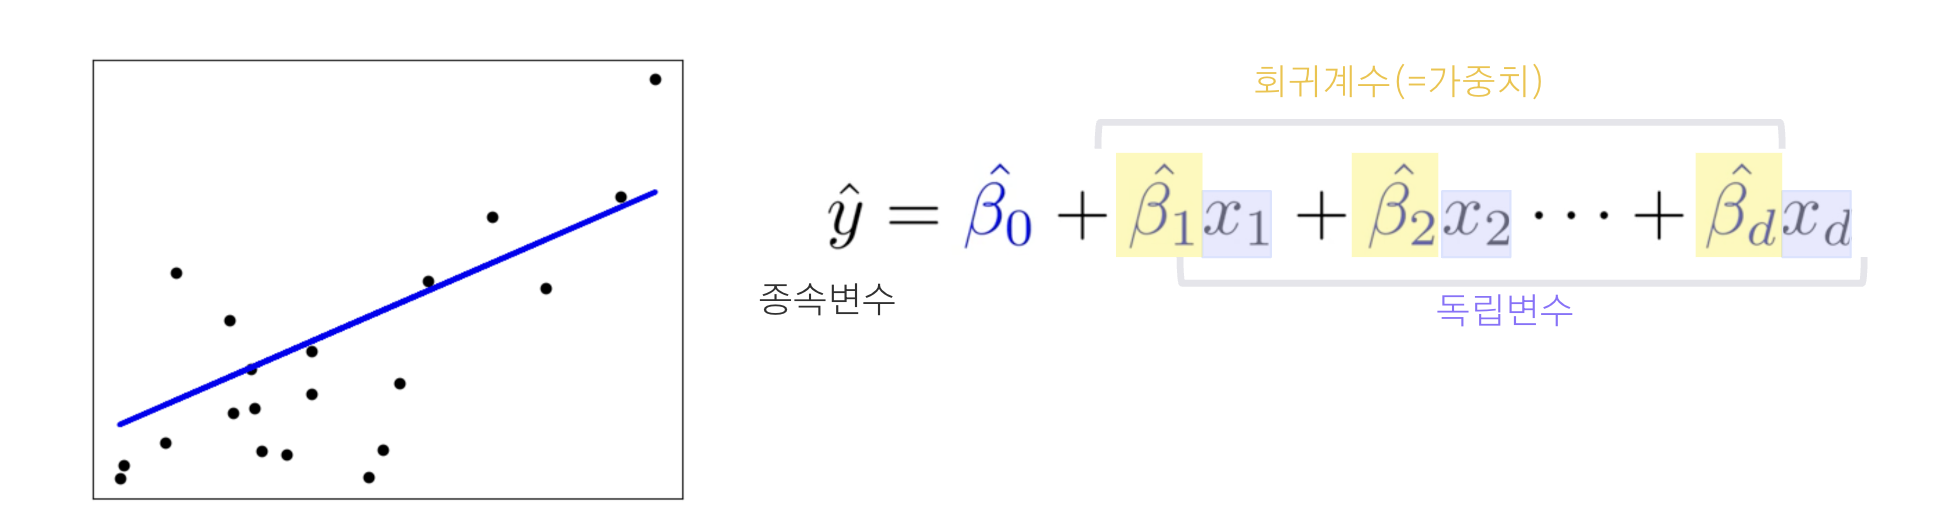

#### 👨‍💻 코드 : (2-1)

In [88]:
X_train.columns     # train_data의 칼럼은 아래와 같이 구성되어 있습니다.

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'PriceRange',
       'AveragePrice', 'PriceDirection', 'DailyReturn', 'MovingAverage5d',
       'MovingAverage20d', 'MovingAverage60d', 'MovingAverage120d',
       'LowerBollingerBand', 'UpperBollingerBand', 'ShortEMA', 'LongEMA',
       'MACD', 'OpenMean', 'OpenMedian', 'HighMean', 'HighMedian', 'LowMean',
       'LowMedian', 'CloseMean', 'CloseMedian', 'VolumeMean', 'VolumeMedian',
       'DateYear', 'DateMonth', 'DateDay', 'ListingDateYear',
       'ListingDateMonth', 'ListingDateDay', 'ClosingMonthInt',
       'LEncodedIndustry', 'LEncodedProducts', 'LEncodedRegion',
       'FEncodedIndustry', 'TEncodedIndustry'],
      dtype='str')

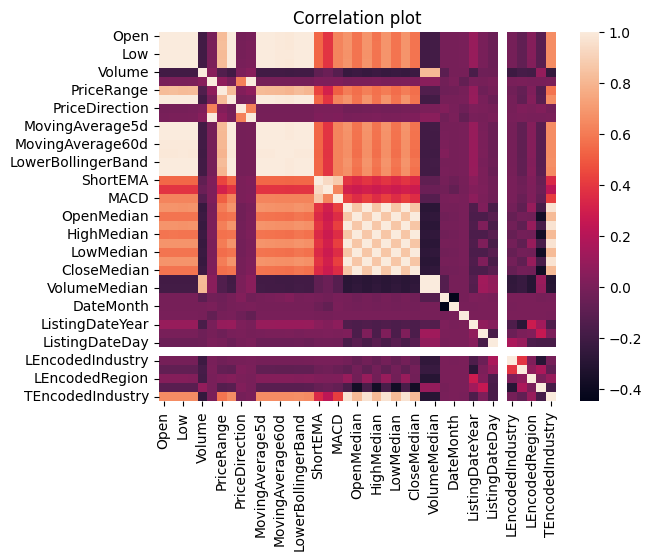

In [89]:
# 회귀 가정 체크 -> 시계열 데이터이다보니 변수(종가, 시가 등)들의 상관관계가 아래와 같이 너무 높습니다.
# 하지만 회귀 가정 중에서는 변수간의 독립성을 고려해야한다는 가정이 존재합니다.
# 따라서 본 시계열 데이터를 바로 회귀모델에 적용하기에는 무리가 있을 수 있습니다.
corr = X_train.corr()
sns.heatmap(corr)

# 시각화를 진행합니다.
plt.title("Correlation plot")
plt.show()

In [90]:
# 일단 독립성에 위배되지만, 모델 결과는 어떻게 나타나는지 sklearn으로 살펴보겠습니다.
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train) # sklearn based의 회귀 모델을 적합시킵니다.

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [91]:
# 위에서 적합된 모델로 MSE와 R^2를 계산해보겠습니다.
y_pred_sk = lin_reg.predict(X_valid)
J_mse_sk = np.sqrt(mean_squared_error(y_pred_sk, Y_valid))
R_square_sk = lin_reg.score(X_valid,Y_valid)

display(f"RMSE : {J_mse_sk}")
display(f"R square : {R_square_sk}")

'RMSE : 7401.6168866712405'

'R square : 0.9990478703288174'

In [92]:
# 동일한 과정을 statsmodel 패키지로 사용해보겠습니다. 조금 더 디테일한 결과를 얻을 수 있습니다.
# 모델 적합 결과는 sklearn과 동일함을 알 수 있습니다.
model = sm.OLS(Y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.055e+05
Date:                Tue, 10 Feb 2026   Prob (F-statistic):               0.00
Time:                        22:31:59   Log-Likelihood:            -2.3182e+05
No. Observations:               22552   AIC:                         4.637e+05
Df Residuals:                   22516   BIC:                         4.640e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Open                  -0.0442      0

- 조금 더 상황에 맞게 해석해보겠습니다.
  1. 모든 회귀 변수의 t statistics와 p-value는 매우 유효하다고 확인되고 있습니다. 모든 변수의 p-value가 0이라고 나오고, t statistics도 매우 크기 때문입니다. `coef`는 회귀 계수의 실질적인 값을 나타냅니다.
  2. 회귀 모델의 전반적인 신뢰도를 나타내는 `f_statistics`도 매우 높으므로, 표본에 대한 회귀 계수들의 설명력은 높은 상태라고 생각할 수 있습니다.
- **하지만 이 회귀모형은 애초에 가정을 만족하지 않는 모형이라는 것을 기억하세요!**

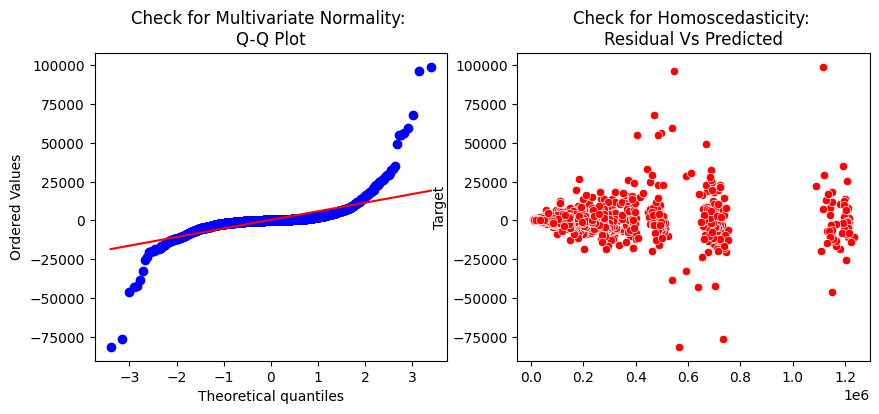

In [93]:
# QQ plot으로 가정을 만족하는지 체크해보겠습니다.
f,ax = plt.subplots(1,2,figsize=(10,4))
_,(_,_,r)= sp.stats.probplot((Y_valid - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

# 등분산성도 체크해보겠습니다.
sns.scatterplot(y = (Y_valid - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

# QQ plot이 비선형적으로 휘어져있고, 등분산성은 다소 만족하는 모습을 보여줍니다.
# QQ plot으로 보아 이는 선형회귀 가정이 만족되고 있지 않음을 보여줍니다.

In [94]:
# VIF를 체크해봐도 터무니없이 높음을 알 수 있습니다. 이는 앞서 확인한 상관계수들과 관련이 있습니다.
VIF = 1/(1- R_square_sk)
display(f"VIF: {VIF}")

# 따라서 본 시계열 데이터는 단순 선형 회귀로는 가정도 만족하지 않을 뿐더러, 적합하지 않습니다.
# 아래 다른 모델들을 더 살펴보도록 하겠습니다.

'VIF: 1050.277110635474'

### 2-2 KNN

#### 📝 설명 : (2-2)
- 가까운 이웃에 위치한 K개의 데이터를 보고, 데이터가 속할 그룹을 판단하는 과정

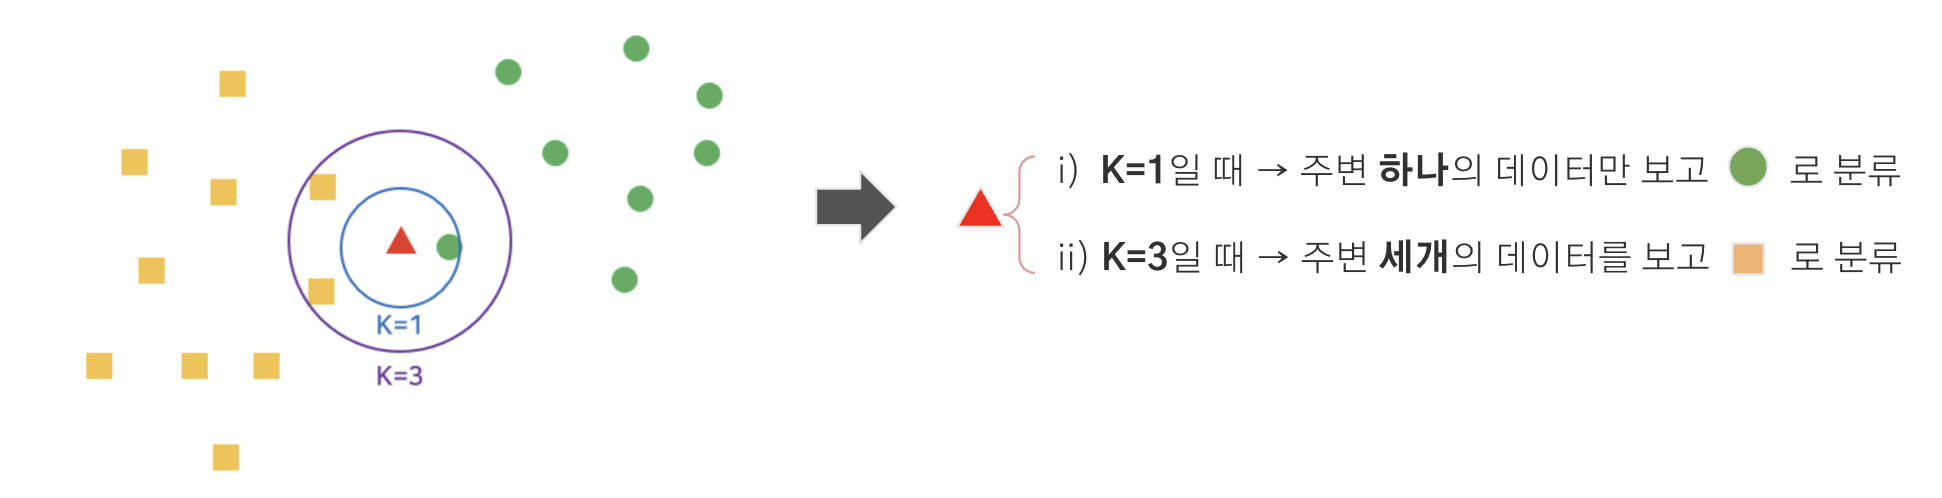

#### 👨‍💻 코드 : (2-2)

In [95]:
# 이론 수업 시간에 KNN은 K가 하이퍼 파라미터로서, K값에 따라 KNN의 성능이 달라질 수 있다는 것을 배웠습니다.
# 따라서 본 실습에서는 이를 관찰하고, 최적의 K값도 찾아보겠습니다. (본 반복문은 18분 정도 소요됩니다.)
knn_db=[]
for i in tqdm(range(3,15,2)):
    M=[]
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(Y_valid, y_pred))   # MSE를 K값에 따라 저장하도록 설정합니다.
    M.append(i)
    M.append(rmse)
    knn_db.append(M)

100%|██████████| 6/6 [00:00<00:00, 28.07it/s]


In [96]:
# 최적의 k값을 찾기 위한 장치입니다. MSE가 가장 작게 나오는 모델을 적합시킨 K값을 최적의 값으로 설정하겠습니다.
min=knn_db[0];
for i in range(len(knn_db)):
    if knn_db[i][1]<min[1]:
        min=knn_db[i];
n=min[0];

# 최적의 K 값이 반환됩니다.
display(n)

3

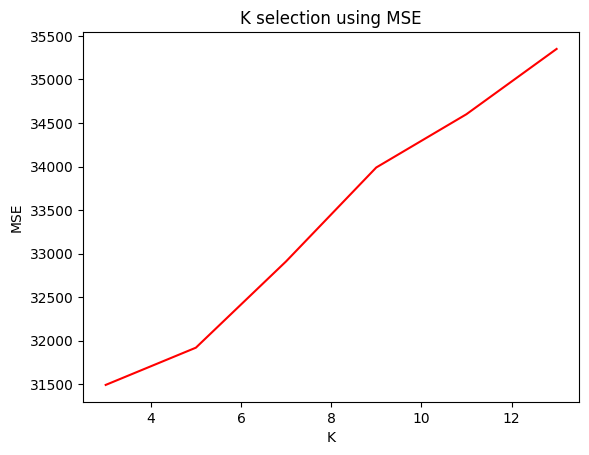

In [97]:
# K값에 따른 MSE 변화를 시각화해보면 아래와 같습니다. K=3일 때 가장 낮은 MSE를 보이는 것을 알 수 있습니다.
# K값이 올라갈수록 MSE가 증가하는 것을 확인할 수 있습니다.
x = [x[0] for x in knn_db]
y = [x[1] for x in knn_db]

# 시각화를 진행합니다.
plt.plot(x, y, color='red')
plt.title('K selection using MSE')
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

In [98]:
# 위에서 찾은 최적의 K값을 이용해 모델을 학습시켜 결과를 관찰합니다.
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, Y_train)
# ytrainpredict_kk = knn.predict(X_train)     # 시간이 꽤 오래걸리므로 생략하겠습니다.
ytestpredict_kk = knn.predict(X_valid)

In [99]:
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
display(f'RMSE Test: {np.sqrt(metrics.mean_squared_error(Y_valid, ytestpredict_kk))}')

'RMSE Test: 31491.588574935784'

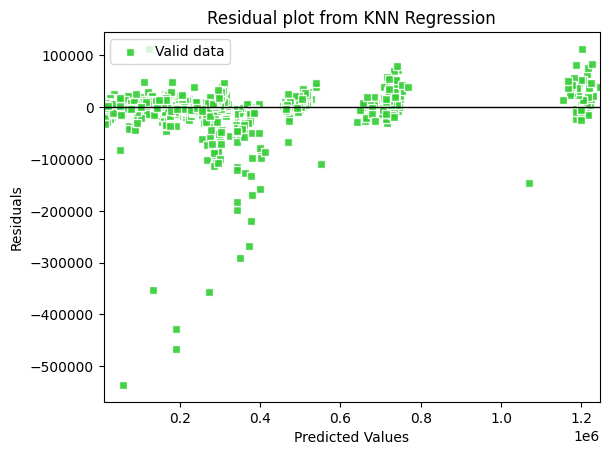

In [100]:
# 모델 적합 결과를 시각화해 보겠습니다. (잔차플롯)
plt.scatter(ytestpredict_kk, ytestpredict_kk-Y_valid, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Valid data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_kk.min()-1, xmax=ytestpredict_kk.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_kk.min()-1, ytestpredict_kk.max()+1])
plt.title('Residual plot from KNN Regression')
plt.show()

### 2-3. Decision Tree

#### 📝 설명 : (2-3)
- 데이터 내 규칙을 찾아 Tree 구조로 데이터를 분류/회귀 하는 과정

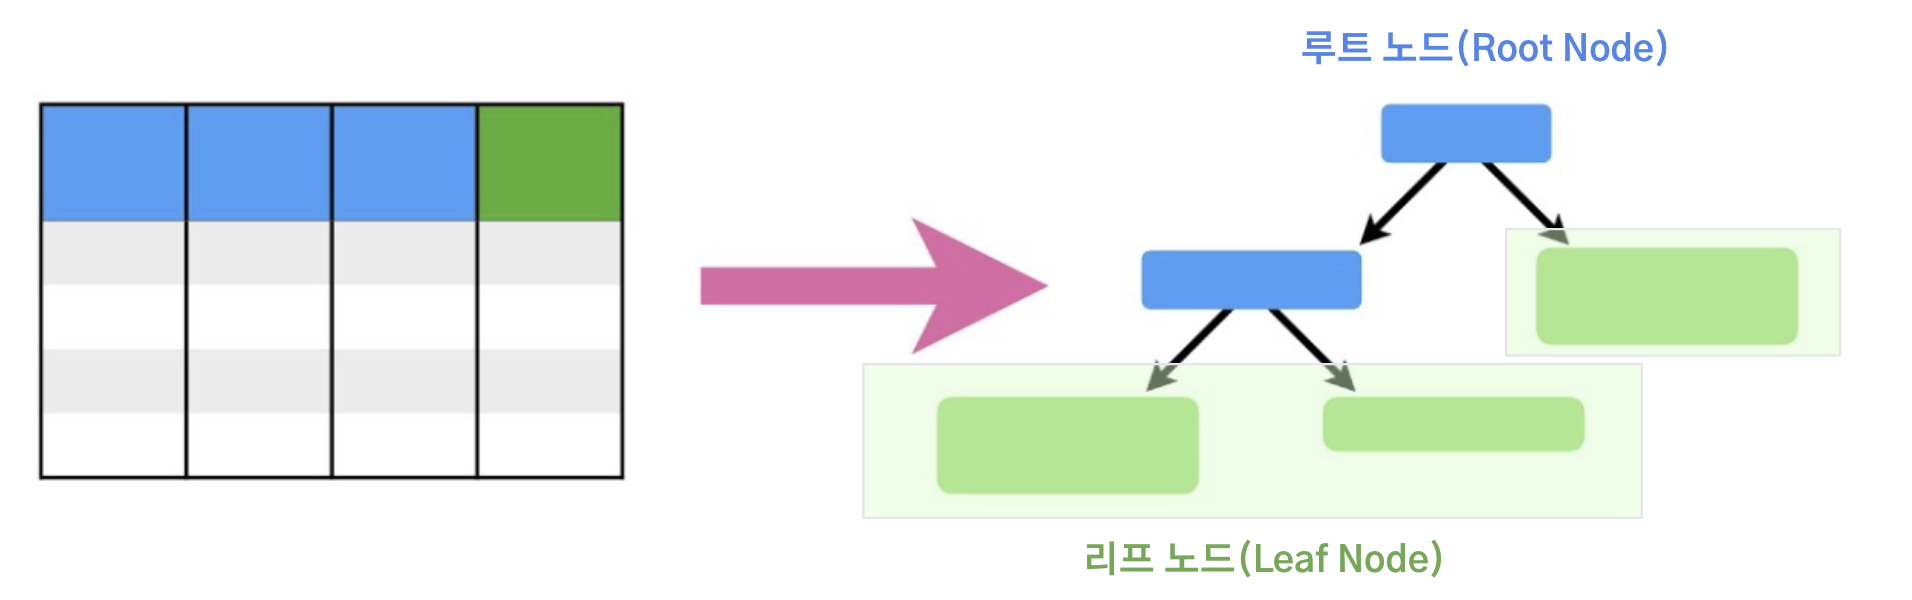


#### 👨‍💻 코드 : (2-3)

In [101]:
# DecisionTreeRegressor 이용해 의사결정나무를 만듭니다.
dt = DecisionTreeRegressor(
    max_depth=10, # 트리의 깊이를 규제합니다.
    random_state=1214, # 트리의 랜덤시드를 설정합니다.
    min_samples_split=100 # 해당하는 샘플이 100개 이상이면 split하도록 합니다.
    )

dt.fit(X_train, Y_train)
ytrainpredict_df = dt.predict(X_train)
ytestpredict_df = dt.predict(X_valid)

In [102]:
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
display(f"RMSE Train: {np.sqrt(metrics.mean_squared_error(Y_train, ytrainpredict_df))}")
display(f"RMSE Test: {np.sqrt(metrics.mean_squared_error(Y_valid, ytestpredict_df))}")

'RMSE Train: 7175.520355084955'

'RMSE Test: 8741.320965002189'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.488994 to fit



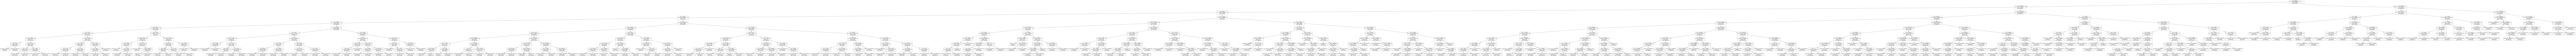

In [103]:
# 트리를 시각화해보도록 하겠습니다. 트리의 깊이가 깊어지면 시각화에 시간이 오래걸릴 수 있습니다.
export_graphviz(dt, out_file ='tree.dot')
with open("tree.dot") as f:
    dot_graph = f.read()

pydot_graph = pydotplus.graph_from_dot_file("tree.dot")
Image(pydot_graph.create_png())

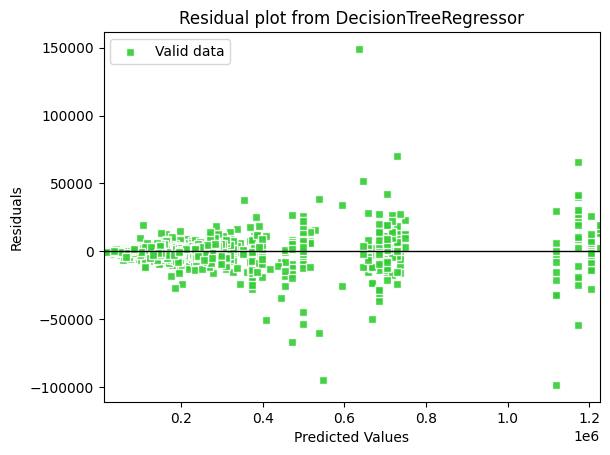

In [104]:
# 모델 적합 결과를 시각화해 보겠습니다. (잔차플롯)
plt.scatter(ytestpredict_df, ytestpredict_df-Y_valid, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Valid data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_df.min()-1, xmax=ytestpredict_df.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_df.min()-1, ytestpredict_df.max()+1])
plt.title('Residual plot from DecisionTreeRegressor')
plt.show()

### 2-4. Random Forest


#### 📝 설명 : (2-4)
* 배깅(Bagging)의 일종으로, 학습시키는 데이터 뿐 아니라 특성변수(X)들도 무작위로 선택해 트리를 생성하는 방법
  - 모델 학습 과정에서 서로 다른 N개의 Tree 생성
  - N개의 Tree에서 발생한 Output을 Voting(범주형, 분류문제)하거나, Average(연속형, 회귀문제)해 최종 Output 생성   
    → High variance, Low bias 상황에서 분산(Variance) 감소에 도움

#### 👨‍💻 코드 : (2-4)

In [105]:
# RandomForestRegressor를 이용해 회귀 모델을 적합시키겠습니다.
forest_rf = RandomForestRegressor(n_estimators=10, criterion='squared_error', random_state=1, n_jobs=-1)
forest_rf.fit(X_train, Y_train)
ytestpredict_rf = forest_rf.predict(X_valid)

In [106]:
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(Y_valid, ytestpredict_rf))}')

RMSE test: 8456.237937358952


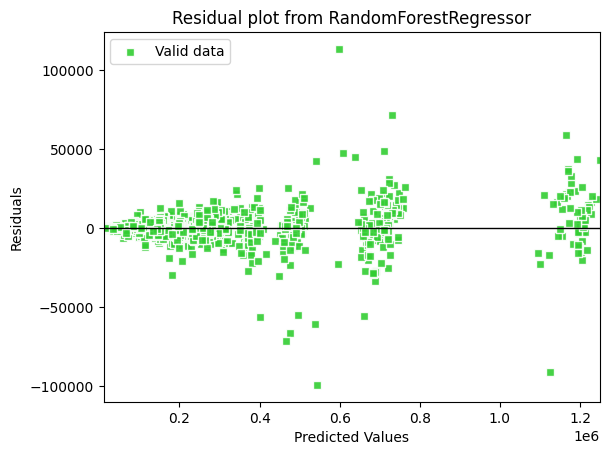

In [107]:
# 모델 적합 결과를 시각화해 보겠습니다. (잔차플롯)
plt.scatter(ytestpredict_rf, ytestpredict_rf-Y_valid, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Valid data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_rf.min()-1, xmax=ytestpredict_rf.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_rf.min()-1, ytestpredict_rf.max()+1])
plt.title('Residual plot from RandomForestRegressor')
plt.show()

이렇게 여러가지 머신러닝 모델들을 살펴보았습니다. 위 적합 결과를 시각화 해보면 아래와 같습니다.    
> 성능은 실행 결과에 따라 조금씩 다르게 나올 수 있습니다!

|머신러닝 모델|적합 결과 ($RMSE_{test}$)|특이 사항|
|:---:|:---:| :------- : |
|Linear Regression|2198.80| 변수간 다중공선성, 시계열 가정에 위반된 모델이었음(유의한 모델이라고 보기 어려움) |
|KNN|9431.77| Scaling, $K$ 값 선정에 유의할 것 |
|Decision Tree| 2517.74 |  Overfitting 방지를 위한 적절한 depth 등의 선정에 유의할 것 |
|Random Forest| **2478.52** |  Overfitting 방지를 위한 랜덤 포레스트 하이퍼 파라미터 선정에 유의할 것 |

## 3. 부동산 데이터에 관한 회귀분석
```
💡 목차 개요 : 부동산 데이터셋을 이용해 추가 회귀분석을 진행해보도록 하겠습니다.
```
- 3-1 회귀분석 모델링

In [117]:
# 데이터를 불러오도록 하겠습니다.
data_file = "housing_train.csv"
df = pd.read_csv(data_file)

# Id 컬럼 제거 및 수치형 컬럼만 선택 (회귀분석용)
df = df.drop(['Id'], axis=1)
df = df.select_dtypes(include=[np.number])
df.dropna(inplace=True)

# Target(SalePrice)과 독립변수들을 분리해줍니다.
y_train = df['SalePrice']
X_train = df.drop(['SalePrice'], axis=1)

# 학습 데이터와 검증 데이터를 8:2 비율로 나누겠습니다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

- 앞선 상황에서는 변수간에 상관관계가 매우 높아서 회귀 분석을 제대로 진행할 수 없었습니다.
- 시계열 정상성 등의 가정을 맞추고 ARIMA 등의 모델을 이용할 순 있겠지만, 강의 범위에 벗어나므로 따로 다루지 않겠습니다.


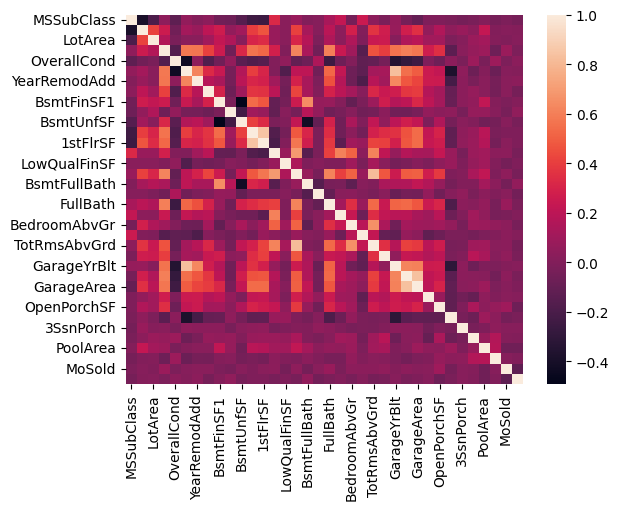

In [118]:
# 상관계수를 체크해봤을 때 위 주식데이터와 비교하여 매우 양호한 상황입니다.
corr = X_train.corr()
sns.heatmap(corr);
plt.show()

In [ ]:
# 회귀모델을 적합해보겠습니다. 총 80개의 변수가 존재하기에 각 독립변수별로 회귀계수가 출력된 것을 확인할 수 있습니다.
# p-value가 낮은 것도 있고, 높은 변수도 있습니다. 이는 모든 변수가 모두 유효하지는 않음을 나타냅니다.
# 하지만 F-statistics도 높고, R-squard도 꽤 높은 경향을 보이므로, 독립변수들이 타겟변수를 비교적 잘 설명한다고 할 수 있습니다.
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              714.9
Date:                Tue, 10 Feb 2026   Prob (F-statistic):                        0.00
Time:                        22:32:03   Log-Likelihood:                         -10715.
No. Observations:                 896   AIC:                                  2.150e+04
Df Residuals:                     862   BIC:                                  2.166e+04
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [111]:
# 사이킷런도 이용해보겠습니다.
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # sklearn based의 회귀 모델을 적합시킵니다.

# 위에서 적합된 모델로 MSE와 R^2를 계산해보겠습니다.
y_pred_sk = lin_reg.predict(X_val)
J_mse_sk = mean_squared_error(y_pred_sk, y_val)
R_square_sk = lin_reg.score(X_val,y_val)

display(f"The Mean Square Error(MSE) : {J_mse_sk}")
display(f"R square : {R_square_sk}")

# 앞선 sm.OLS 결과와 비슷한 결과를 얻는 것을 확인할 수 있습니다.

'The Mean Square Error(MSE) : 903920854.840861'

'R square : 0.8590576462463193'

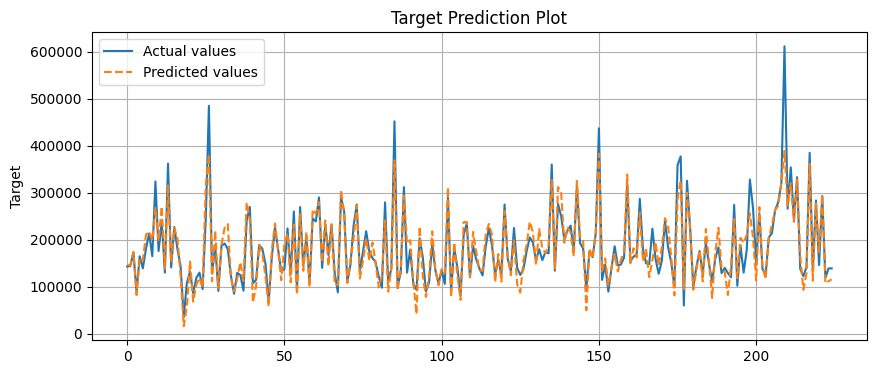

In [120]:
# 예측 값을 시각화해보면 아래와 같습니다.
plt.figure(figsize=(10,4))
sns.lineplot(x=range(0, len(y_val)), y=y_val.values, label="Actual values", alpha=1.0)
sns.lineplot(x=range(0, len(y_pred_sk)), y=y_pred_sk, label="Predicted values", alpha=1.0, linestyle='--')

plt.title("Target Prediction Plot")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()

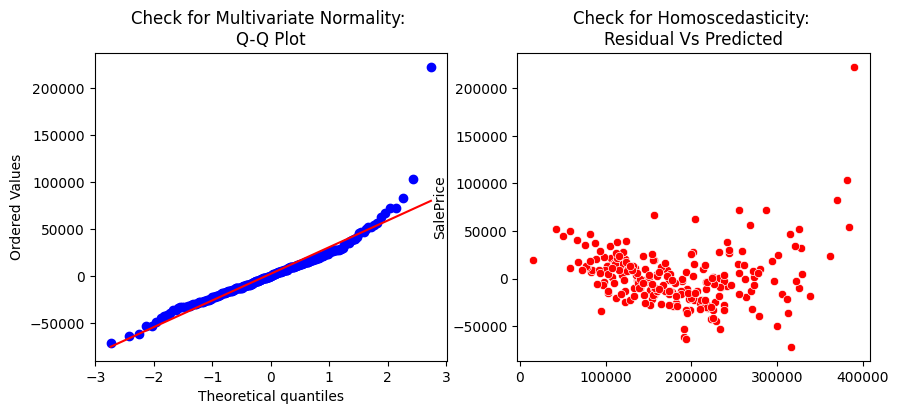

In [113]:
# QQ plot으로 가정을 만족하는지 체크해보겠습니다.
f,ax = plt.subplots(1,2,figsize=(10,4))
_,(_,_,r)= sp.stats.probplot((y_val - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title("Check for Multivariate Normality: \nQ-Q Plot")

# 등분산성도 체크해보겠습니다.
sns.scatterplot(y = (y_val - y_pred_sk), x= y_pred_sk, ax = ax[1],color="r")
ax[1].set_title("Check for Homoscedasticity: \nResidual Vs Predicted");

- 앞선 주식데이터 예시와 비교했을 때 직선에 잘 피팅되는 QQ plot을 보여줍니다.
- 앞선 주식데이터 예시와 비교했을 때 등분산성도 더 잘 만족하는 모습니다.

In [114]:
# VIF(다중공선성)도 체크해보겠습니다.
VIF = 1/(1- R_square_sk)

display(f"VIF: {VIF}")

'VIF: 7.095099332225287'

- 이 정도면 완벽히 양호한 수준은 아니지만, 앞선 변수들 중에서 상관관계가 높은 변수들이 몇몇 있었습니다. 이러한 변수의 영향으로 보여집니다.
- 하지만 앞선 주식 데이터의 상황보다는 훨씬 개선된 모습을 보이며, 이런 데이터 환경에서 회귀분석은 꽤 유효하다고 볼 수 있습니다.
- 더 낮은 다중공선성을 지닌 모델을 만들려면 변수 선택이 필요한 상황입니다!

#Reference

- [이론 자료](https://docs.google.com/presentation/d/1-X0CXRiBkWNGdC2x9RATcsdsrWd9CLZ6/edit?rtpof=true)